In [174]:
import pandas as pd
import numpy as np
import regex as re
from matplotlib import pyplot as plt
from docplex.mp.model import Model
import importlib

import load_data as ld
import analytics as an
import models as md

# Reloads all local modules
def reload_all():
    for _ in [ld, an, md]:
        importlib.reload(_)

# Load in Map Data

### Small Data

In [2]:
specs_small = ld.get_specs('smallexample')
s_c, s_t, s_b = ld.load_data('smallexample', specs_small)

Number of beams: 5
Vertical pixel resolution: 8
Horizontal pixel resolution: 8 
Maximum Dose Allowed Over Critical Area: 2
Minimum Dose Required Over Tumor Area: 10

Map Loaded: Critical
Map Loaded: Tumor
Map Loaded: Beams


### Actual Data

In [141]:
specs_actual = ld.get_specs('actualexample')
a_c, a_t, a_b = ld.load_data('actualexample', specs_actual)

Number of beams: 126
Vertical pixel resolution: 60
Horizontal pixel resolution: 80 
Maximum Dose Allowed Over Critical Area: 2
Minimum Dose Required Over Tumor Area: 10

Map Loaded: Critical
Map Loaded: Tumor
Map Loaded: Beams


# Model 1
min $\sum_{i}$ $\sum_{j}$ $\sum_{k}$ x(i) b(ijk) (t(jk))

st 

$\sum_{i}$ x(i) b(ijk) <= 2 for every critical cell (jk)

$\sum_{i}$ x(i) b(ijk) >= 10 for every tumor cell (jk)
   
x(i) >= 0 for every beam (i)

In [4]:
if False:
    sol = md.build_model_1(specs_actual, a_c, a_t, a_b)
    an.plot_beams(sol, a_b, a_c, a_t, print_vars = True)
else:
    sol = md.build_model_1(specs_small, s_c, s_t, s_b)
    an.plot_beams(sol, s_b, s_c, s_t, print_vars = True)

Intensity variables added.
CRITICAL ERROR FOR 0 1
CRITICAL ERROR FOR 0 2
CRITICAL ERROR FOR 1 2
CRITICAL ERROR FOR 2 0
Intensity constraints added.
Object Function Constructed.
-5.200x1-4.200x2-3.600x3+1.200x4-3.100x5
Model Exported.
Model: m1
 - number of variables: 5
   - binary=0, integer=0, continuous=5
 - number of constraints: 25
   - linear=25
 - parameters: defaults
 - objective: minimize
 - problem type is: LP
ERROR: NO SOLUTION


AttributeError: 'NoneType' object has no attribute 'iter_var_values'

# Model 2
min $\sum_{i}$ $\sum_{j}$ $\sum_{k}$ x(i) b(ijk) (c(jk))

st 

$\sum_{i}$ x(i) b(ijk) - s(jk) <= 2 for every critical cell (jk)

$\sum_{i}$ x(i) b(ijk) + s(jk) >= 10 for every tumor cell (jk)
   
x(i) >= 0 for every beam (i)

0 <= s(jk) <= 10  for every slack/surplus variable

Intensity variables added.
Intensity constraints added.
Object Function Constructed.
Model Exported.
Model: m2
 - number of variables: 9726
   - binary=0, integer=0, continuous=9726
 - number of constraints: 20026
   - linear=20026
 - parameters: defaults
 - objective: minimize
 - problem type is: LP
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 4 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 3 threads...
Tried aggregator 1 time.
LP Presolve eliminated 20026 rows and 9726 columns.
All rows and columns eliminated.
Presolve time = 0.03 sec. (5.55 ticks)

Dual simplex solved model.

Model Solved.
x3 15.625
x5 15.625
x9 14.492753623188408
x11 1.93661971830986
x15 13.513513513513512
x17 13.513513513513512
x21 13.513513513513512
x27 12.5
x29 12.345679012345679
x33 12.82051282051282
x35 13.157894736842106
x66 0.3523608174770967
x77 15.625
x

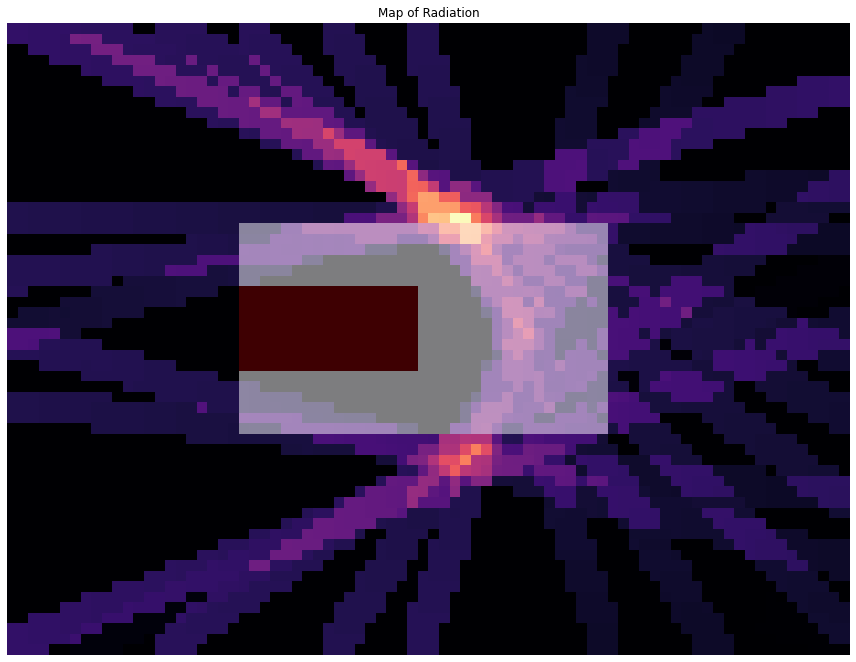

In [5]:
if True:
    sol = md.build_model_2(specs_actual, a_c, a_t, a_b)
    an.plot_beams(sol, a_b, a_c, a_t, print_vars = True)
    an.report_effectiveness(sol, a_b, a_c, a_t, plot=False)
else:
    sol = md.build_model_2(specs_small, s_c, s_t, s_b)
    an.plot_beams(sol, s_b, s_c, s_t, print_vars = True)
    an.report_effectiveness(sol, s_b, s_c, s_t, plot=False)

# Model 2.1
min $\sum_{i}$ $\sum_{j}$ $\sum_{k}$ x(i) b(ijk) (c(jk)) + s1(jk) t(jk) + s2(jk) c(jk)

st 

$\sum_{i}$ x(i) b(ijk) - s1(jk) <= 2 for every critical cell (jk)

$\sum_{i}$ x(i) b(ijk) + s2(jk) >= 10 for every tumor cell (jk)
   
0 <= x(i) <= 100 for every beam (i)

0 <= s(jk) <= 10 for every slack/surplus variable (jk)

Intensity variables added.
Intensity constraints added.
Object Function Constructed.
Model Exported.
Model: m1
 - number of variables: 9726
   - binary=0, integer=0, continuous=9726
 - number of constraints: 20026
   - linear=20026
 - parameters: defaults
 - objective: minimize
 - problem type is: LP
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 4 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 3 threads...
Tried aggregator 1 time.
LP Presolve eliminated 19704 rows and 9331 columns.
Reduced LP has 322 rows, 395 columns, and 4393 nonzeros.
Presolve time = 0.06 sec. (7.12 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            10.000000
Iteration:    62   Dual objective     =           550.355840
Iteration:   124   Dual objective     =           881.711126
Iteration:   186   Dual objective     =          1078.15400

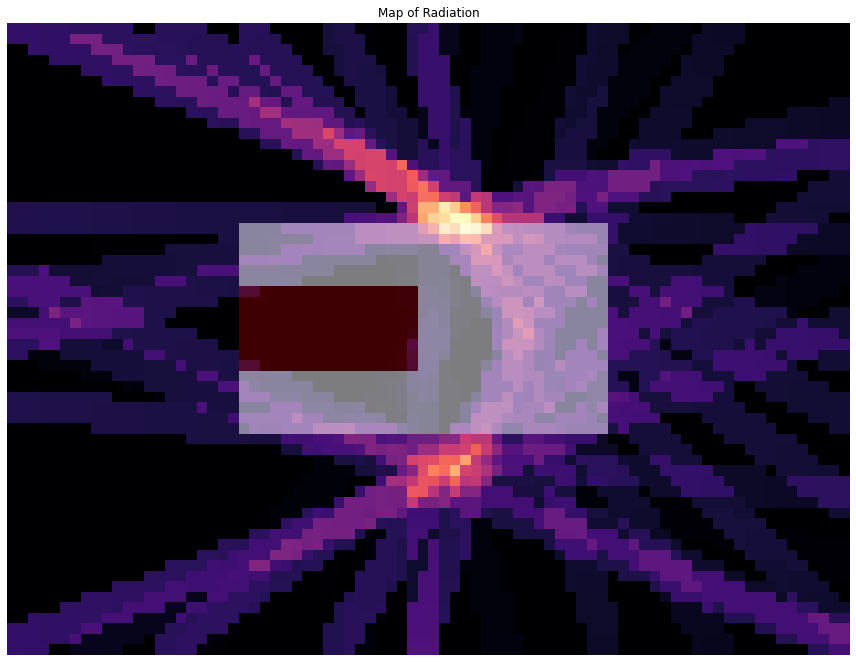

In [6]:
if True:
    sol = md.build_model_2_1(specs_actual, a_c, a_t, a_b)
    an.plot_beams(sol, a_b, a_c, a_t, print_vars = True)
    an.report_effectiveness(sol, a_b, a_c, a_t, plot=False)
else:
    sol = md.build_model_2_1(specs_small, s_c, s_t, s_b)
    an.plot_beams(sol, s_b, s_c, s_t, print_vars = True)
    an.report_effectiveness(sol, s_b, s_c, s_t, plot=False)

# Model 3
min $\sum_{i}$ $\sum_{j}$ $\sum_{k}$ x(i) b(ijk) (c(jk) + p(critical) c_neighbor(jk)) + s1(jk) t(jk) + s2(jk) c(jk)

st 

$\sum_{i}$ x(i) b(ijk) - s1(jk) <= 2 for every critical cell (jk)

$\sum_{i}$ x(i) b(ijk) + s2(jk) >= 10 for every tumor cell (jk)
   
0 <= x(i) <= 100 for every beam (i)

0 <= s(jk) <= 2 for every slack variable (jk)

0 <= s(jk) <= 10 for every surplus variable (jk)

Intensity variables added.
Intensity constraints added.
Object Function Constructed.
Model Exported.
Model: m1
 - number of variables: 9726
   - binary=0, integer=0, continuous=9726
 - number of constraints: 20026
   - linear=20026
 - parameters: defaults
 - objective: minimize
 - problem type is: LP
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 4 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 3 threads...
Tried aggregator 1 time.
LP Presolve eliminated 19695 rows and 9321 columns.
Reduced LP has 331 rows, 405 columns, and 4494 nonzeros.
Presolve time = 0.05 sec. (7.16 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            10.000000
Iteration:    71   Dual objective     =           639.638573
Iteration:   137   Dual objective     =          1100.107912

Dual simplex solved model.

Model Solved.
x3 15.625
x5 15.

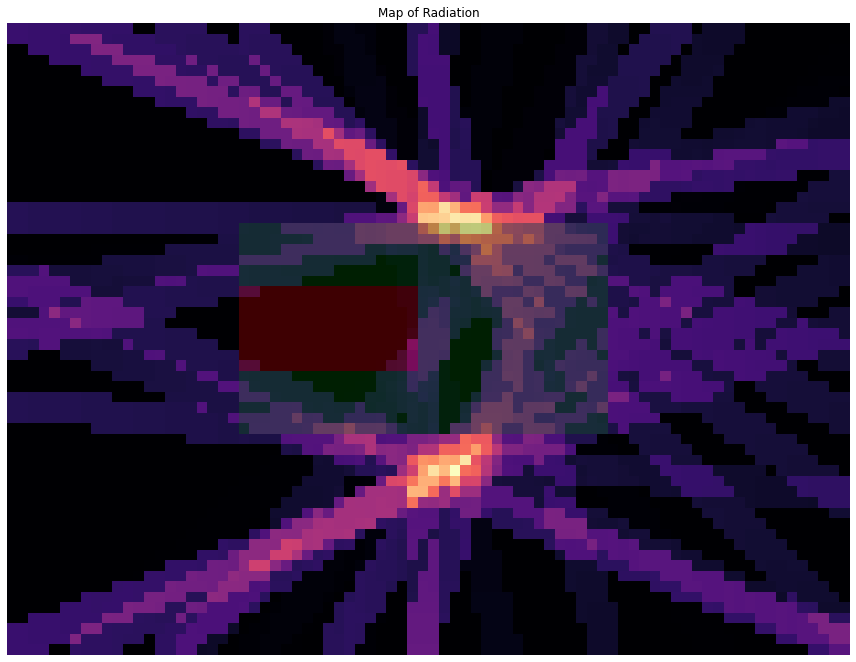

In [178]:
reload_all()
if True:
    sol = md.build_model_3(specs_actual, a_c, a_t, a_b)
    an.plot_beams(sol, a_b, a_c, a_t, print_vars = True, cmap_choice = 'magma')
    an.report_effectiveness(sol, a_b, a_c, a_t, plot=False)
else:
    sol = build_model_3(specs_small, s_c, s_t, s_b)
    an.plot_beams(sol, s_b, s_c, s_t, print_vars = True)
    an.report_effectiveness(sol, s_b, s_c, s_t, plot=False)

# Model 4: Surgical Removal

#### Model
min $\sum_{i}$ $\sum_{j}$ $\sum_{k}$ x(i) b(ijk) (c(jk) + $\alpha$ c_n(jk)) + s1(jk) (t(jk) - $\beta$ tr(jk)) + s2(jk) (c(jk) + $\alpha$ c_n(jk))

st 

$\sum_{i}$ x(i) b(ijk) - s1(jk) <= 2 $\forall$ (j,k) if c(j,k) = 1  $\in$ (J, K)

$\sum_{i}$ x(i) b(ijk) tr(jk) + s2(jk) >= 10 $\forall$ (j,k) if t(j,k) = 1 $\in$ (J, K)
   
0 <= x(i) <= 100 $\forall$ i $\in$ (I)

0 <= s(jk) <= 2 $\forall$ (j,k) if c(j,k) = 1  $\in$ (J, K)

0 <= s(jk) <= 10 $\forall$ (j,k) if t(j,k) = 1 $\in$ (J, K)


#### New Variables

$\alpha$ = P(Critical Region Not Identified Properly)

$\beta$ = P(Tumor Regrew After Removal)

tr(jk) = Tumor Removed from Cell (jk)

Intensity variables added.
Intensity constraints added.
Object Function Constructed.
Model Exported.
Model: m1
 - number of variables: 9726
   - binary=0, integer=0, continuous=9726
 - number of constraints: 15127
   - linear=15127
 - parameters: defaults
 - objective: minimize
 - problem type is: LP
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 4 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 3 threads...
Tried aggregator 1 time.
LP Presolve eliminated 14809 rows and 9334 columns.
Reduced LP has 318 rows, 392 columns, and 4328 nonzeros.
Presolve time = 0.03 sec. (6.01 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            10.000000
Iteration:    85   Dual objective     =           770.005784
Iteration:   147   Dual objective     =          1064.564531

Dual simplex solved model.

Model Solved.
x3 15.625
x5 15.

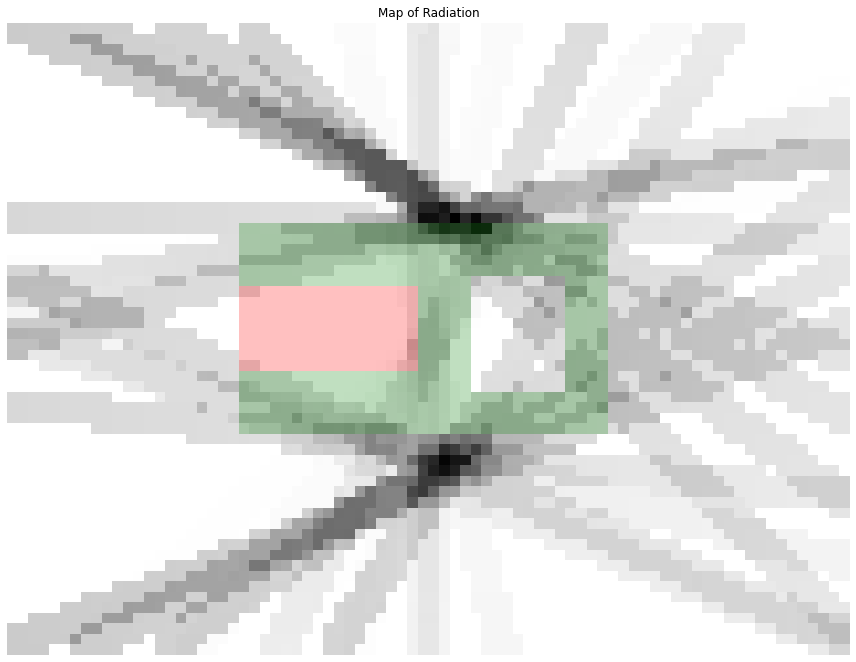

In [181]:
reload_all()
if True:
    sol, t_removed = md.build_model_4(specs_actual, a_c, a_t, a_b)
    an.plot_beams(sol, a_b, a_c, t_removed, print_vars = True, cmap_choice = 'binary')
    an.report_effectiveness(sol, a_b, a_c, t_removed, plot=False)
else:
    sol = md.build_model_4(specs_small, s_c, s_t, s_b)
    an.plot_beams(sol, s_b, s_c, t_removed, print_vars = True)
    an.report_effectiveness(sol, s_b, s_c, t_removed, plot=False)

# Model 5: Magnetic Fields
#### Model
min $\sum_{m}\sum_{i}\sum_{j}\sum_{k}$ x(mi) b(mijk) (c(jk) + $\alpha$ c_n(jk)) + s1(jk) (t(jk) - $\beta$ tr(jk)) + s2(jk) (c(jk) + $\alpha$ c_n(jk))

st 

$\sum_{m}\sum_{i}$ x(mi) b(mijk) - s1(jk) <= 2 $\forall$ (j,k) if c(j,k) = 1  $\in$ (J, K)

$\sum_{m}\sum_{i}$ x(mi) b(mijk) + s2(jk) >= 10 $\forall$ (j,k) if t(j,k)-tr(j,k) = 1 $\in$ (J, K)
   
0 <= x(mi) <= 100 $\forall$ (m,i) $\in$ (M, I)

0 <= s(jk) <= 2 $\forall$ (j,k) if c(j,k) = 1  $\in$ (J, K)

0 <= s(jk) <= 10 $\forall$ (j,k) if t(j,k) = 1 $\in$ (J, K).

#### New Variables
m = Choice of magnetic field $\in$ M = {'None', 'Left', 'Right'}

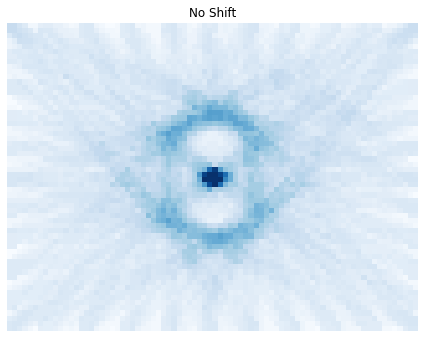

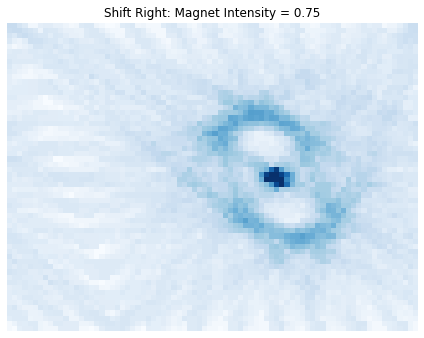

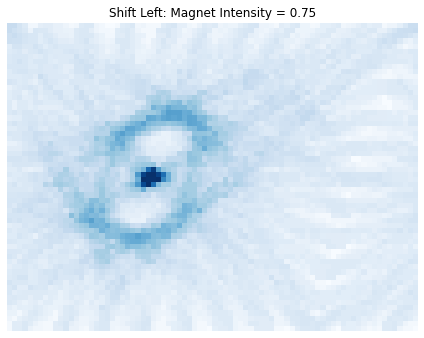

In [177]:
an.plot_magnetic_shifts(a_b)

Intensity variables added.
Intensity constraints added.
Object Function Constructed.
Model Exported.
Model: m1
 - number of variables: 9978
   - binary=0, integer=0, continuous=9978
 - number of constraints: 20179
   - linear=20179
 - parameters: defaults
 - objective: minimize
 - problem type is: LP
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 4 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 3 threads...
Tried aggregator 1 time.
LP Presolve eliminated 19965 rows and 9587 columns.
Reduced LP has 214 rows, 391 columns, and 7934 nonzeros.
Presolve time = 0.03 sec. (8.67 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            10.000000
Iteration:    77   Dual objective     =           480.231748

Dual simplex solved model.

Model Solved.
x3 15.625
x5 15.625
x9 14.492753623188408
x11 14.285714285714286
x15 12.99004

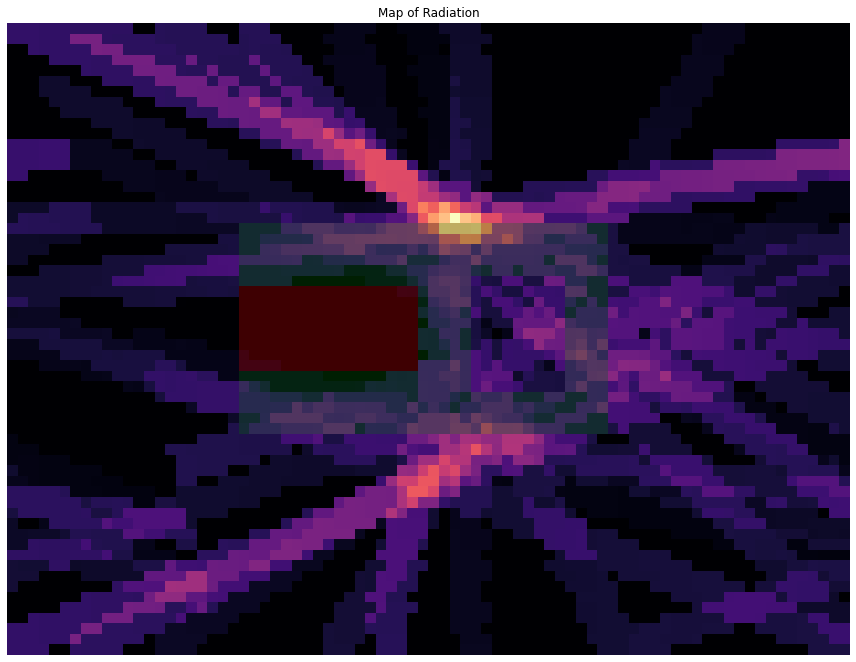

In [180]:
reload_all()
if True:
    sol, t_removed = md.build_model_5(specs_actual, a_c, a_t, a_b)
    an.plot_beams(sol, a_b, a_c, t_removed, print_vars = True, magnetic=True)
    an.report_effectiveness(sol, a_b, a_c, t_removed, plot=False, magnetic=True)
else:
    sol = md.build_model_5(specs_small, s_c, s_t, s_b)
    an.plot_beams(sol, s_b, s_c, t_removed, print_vars = True)
    an.report_effectiveness(sol, s_b, s_c, t_removed, plot=False)